[toc]

2023/04/25

# task 2

导入基本需要的计算以及绘图模块：

In [32]:
dec = 6 # 设置每一步计算保留小数点后位数（精度，可以自己调整）
import numpy as np
np.set_printoptions(formatter={'float': ('{: 0.' + str(dec) + 'f}').format})
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import sympy as sp

## 习题2.11

迭代格式一：

$$
x_{k+1} = \ln x_k+2
$$

In [33]:
def iterationFunc(x):
    return np.round(np.log(x) + 2, dec)
    pass

step = 10
xk = np.zeros(step)
x0 = 2
xk[0] = x0
for i in range(step-1):
    xk[i+1] = iterationFunc(xk[i])
    pass

error = xk[1:] - xk[:-1]

print("xk= ", xk)
print("error= ", error)

xk=  [ 2.000000  2.693147  2.990710  3.095511  3.129953  3.141018  3.144547
  3.145670  3.146027  3.146140]
error=  [ 0.693147  0.297563  0.104801  0.034442  0.011065  0.003529  0.001123
  0.000357  0.000113]


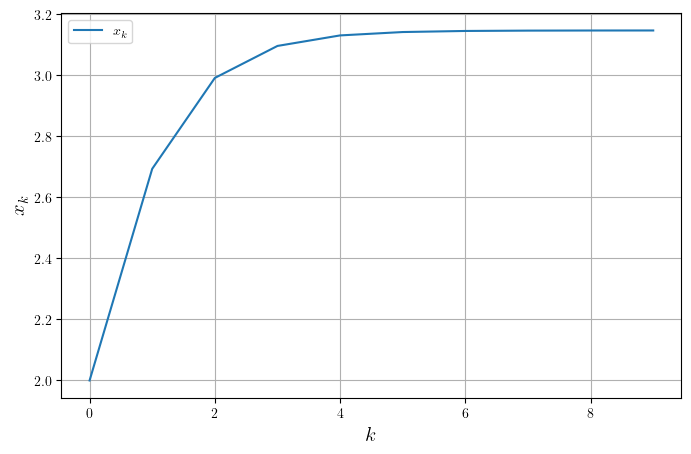

In [34]:
plt.figure(figsize=(8, 5), facecolor="white")
plt.plot(np.arange(0, step), xk, label=r"$x_k$")
plt.legend()
plt.xlabel("$k$", fontsize=15)
plt.ylabel("$x_k$", fontsize=15)
plt.grid(True)
plt.show()

调整一下迭代格式，并只计算4步如下：

$$
\begin{cases}
\begin{aligned}
  &y_k = \ln x_k +2\\
  &z_k = \ln y_k + 2\\
  &x_{k+1} = x_k - \frac{(y_k-z_k)^2}{z_k+x_k-2y_k}
\end{aligned}
\end{cases}
$$

In [35]:
def iterationFuncStephenson(xi):
    yi = iterationFunc(xi)
    zi = iterationFunc(yi)
    x_next = xi - (yi-xi)**2 / (zi+xi-2*yi)
    return np.around(x_next, dec)
    pass

step = 4
xk = np.zeros(step)
x0 = 2
xk[0] = x0
for i in range(step-1):
    xk[i+1] = iterationFuncStephenson(xk[i])
    pass

error = xk[1:] - xk[:-1]

print("xk= ", xk)
print("error= ", error)

xk=  [ 2.000000  3.214540  3.146300  3.146193]
error=  [ 1.214540 -0.068240 -0.000107]


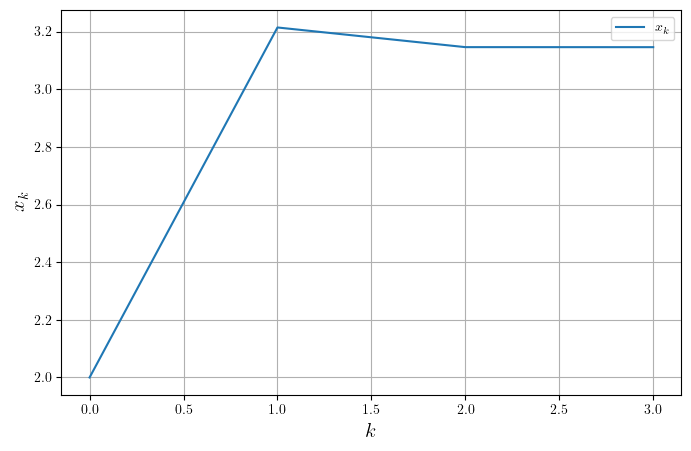

In [36]:
plt.figure(figsize=(8, 5), facecolor="white")
plt.plot(np.arange(0, step), xk, label=r"$x_k$")
plt.legend()
plt.xlabel("$k$", fontsize=15)
plt.ylabel("$x_k$", fontsize=15)
plt.grid(True)
plt.show()

**效果拔群。**

## 习题2.13

In [37]:
x_k, x_k_next, x_real, a, p, q, r = sp.symbols('x_k, x_{k+1}, x^*, a, p, q, r')
expr = p*x_k + q*a/x_k**2 + r*a**2/x_k**5
x_real = a**sp.Rational(1, 3)
expr
iter = sp.Eq(x_k_next, expr)
print("迭代格式：")
iter

迭代格式：


Eq(x_{k+1}, a**2*r/x_k**5 + a*q/x_k**2 + p*x_k)

In [38]:
print("真实解: ")
x_real

真实解: 


a**(1/3)

In [39]:
expr1 = expr.diff(x_k)
print("一阶导：")
expr1

一阶导：


-5*a**2*r/x_k**6 - 2*a*q/x_k**3 + p

In [40]:
expr2 = expr1.diff(x_k)
print("二阶导：")
expr2

二阶导：


30*a**2*r/x_k**7 + 6*a*q/x_k**4

由此建立三个等式如下：

In [41]:
eq1 = sp.Eq(expr.subs(x_k, x_real), x_real)
eq1

Eq(a**(1/3)*p + a**(1/3)*q + a**(1/3)*r, a**(1/3))

In [42]:
eq2 = sp.Eq(expr1.subs(x_k, x_real), 0)
eq2

Eq(p - 2*q - 5*r, 0)

In [43]:
eq3 = sp.Eq(expr2.subs(x_k, x_real), 0)
eq3

Eq(6*q/a**(1/3) + 30*r/a**(1/3), 0)

In [44]:
res = sp.solve(
    [eq1, eq2, eq3],
    [p, q, r]
)
print("p, q, r: ")
res

p, q, r: 


{p: 5/9, q: 5/9, r: -1/9}

查看一下三阶导数，代入上述的 $p,q,r$ 和 $x=a^{\frac{1}{3}}$ ：

In [45]:
expr3 = expr2.diff(x_k).subs(x_k, x_real).subs(res)
expr3

10/a**(2/3)

显然上式是不满足等于零的，因此这个迭代格式三阶收敛。

## 习题2.14

显然这个序列满足如下迭代格式：

$$
x_{k+1} = \sqrt{x_k+2}
$$

因此稍加计算即可：

In [46]:
def iterationFunc(xi):
    return np.around(
        np.sqrt(xi+2),
        dec
    )
    pass

x0 = 0
step = 20
xk = np.zeros(step)
xk[0] = x0
for i in range(step-1):
    xk[i+1] = iterationFunc(xk[i])
    pass
print("xk=\n", xk)

xk=
 [ 0.000000  1.414214  1.847759  1.961571  1.990370  1.997591  1.999398
  1.999849  1.999962  1.999990  1.999997  1.999999  2.000000  2.000000
  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000]


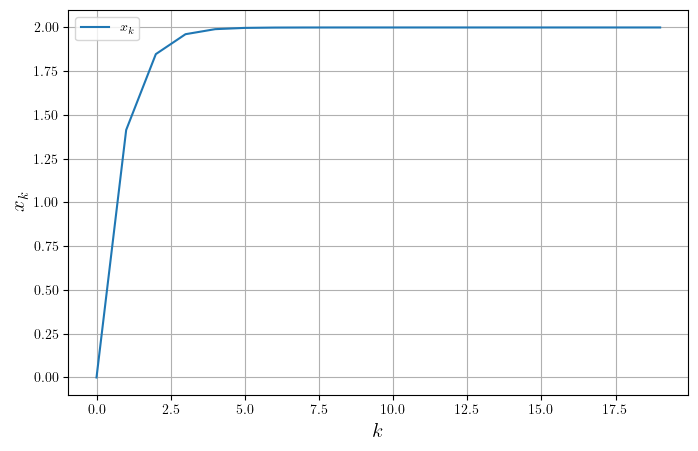

In [47]:
plt.figure(figsize=(8, 5), facecolor="white")
plt.plot(np.arange(0, step), xk, label=r"$x_k$")
plt.legend()
plt.xlabel("$k$", fontsize=15)
plt.ylabel("$x_k$", fontsize=15)
plt.grid(True)
plt.show()

## 习题2.16

事实上这是求解方程的解：

$$
f(x)=x^2-\frac{1}{a}=0
$$

也就是方程：

$$
g(x)=a - \frac{1}{x^2}=0
$$

[ref](https://www.zhaokaoti.com/shiti/b5ace064fd5b495c9fb96344572f9917.html)

In [48]:
x = sp.symbols("x", positive=True)
a = sp.symbols("a", positive=True)
expr = a - 1/x**2
expr1 = expr.diff(x)
print("原函数：")
expr

原函数：


a - 1/x**2

In [49]:
print("一阶导：")
expr1

一阶导：


2/x**3

In [50]:
expr_iter = (x - expr/expr1).expand()
print("迭代格式：")
expr_iter

迭代格式：


-a*x**3/2 + 3*x/2

## 习题2.17

In [51]:
expr = 2*x**2 + 2*x - sp.exp(2*x) + 1
expr1 = expr.diff(x)
iter_expr = x - expr / expr1
iterationFunc = sp.lambdify(x, iter_expr, "numpy")
print("表达式：")
expr

表达式：


2*x**2 + 2*x - exp(2*x) + 1

In [52]:
print("一阶导：")
expr1

一阶导：


4*x - 2*exp(2*x) + 2

In [53]:
print("迭代格式：")
iter_expr

迭代格式：


x - (2*x**2 + 2*x - exp(2*x) + 1)/(4*x - 2*exp(2*x) + 2)

In [54]:
x0 = 0.5
step = 40
xk = np.zeros(step)
xk[0] = x0
for i in range(step-1):
    xk[i+1] = iterationFunc(xk[i])
    pass
print("xk=\n", xk)

xk=
 [ 0.500000  0.348053  0.239056  0.162643  0.109929  0.073967  0.049618
  0.033216  0.022206  0.014831  0.009900  0.006605  0.004406  0.002938
  0.001959  0.001306  0.000871  0.000581  0.000387  0.000258  0.000172
  0.000115  0.000076  0.000051  0.000034  0.000023  0.000015  0.000010
  0.000007  0.000005  0.000002  0.000002  0.000002  0.000002  0.000002
  0.000002  0.000002  0.000002  0.000002  0.000002]


我这里取了40步进行计算，效果如上，一直熟练不到 $0$ ，接下来我用修正牛顿进行操作：

In [55]:
m = 3
iter_expr = x - expr / expr1 * m
iterationFunc = sp.lambdify(x, iter_expr, "numpy")
print("修正牛顿迭代公式：")
iter_expr

修正牛顿迭代公式：


x - 3*(2*x**2 + 2*x - exp(2*x) + 1)/(4*x - 2*exp(2*x) + 2)

In [56]:
x0 = 0.5
step = 40
xkk = np.zeros(step)
xkk[0] = x0
for i in range(step-1):
    xkk[i+1] = iterationFunc(xkk[i])
    pass
print("xkk=\n", xkk)

xkk=
 [ 0.500000  0.044158  0.000327  0.000000  0.000000  0.000000  0.000000
  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
  0.000000  0.000000  0.000000  0.000000  0.000000]


只能说效果拔群↑：

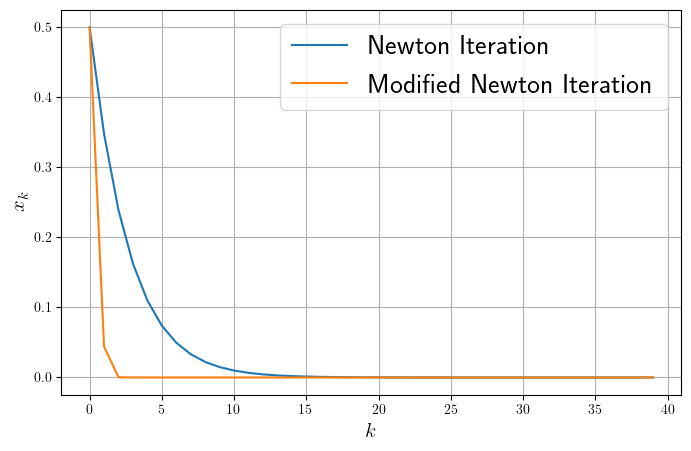

In [57]:
plt.figure(figsize=(8, 5), facecolor="white")
plt.plot(np.arange(0, step), xk, label="Newton Iteration")
plt.plot(np.arange(0, step), xkk, label="Modified Newton Iteration")
plt.legend(fontsize=20)
plt.xlabel("$k$", fontsize=15)
plt.ylabel("$x_k$", fontsize=15)
plt.grid(True)
plt.show()

## 习题2.19

In [58]:
expr = (x**3 - 3*x**2 + 3*x - 1) * (x+3)
expr = expr.factor()
print("原表达式：")
expr

原表达式：


(x - 1)**3*(x + 3)

In [59]:
print("一阶导函数：")
expr1 = expr.diff(x)
expr1 = expr1.factor()
expr1

一阶导函数：


4*(x - 1)**2*(x + 2)

In [60]:
m = 3
x_k1 = sp.symbols("x_{k+1}")

In [61]:
print("x = 1 局部牛顿迭代收敛表达式：")
sp.Eq(x_k1, x_k - expr.subs(x, x_k) / expr1.subs(x, x_k)*m)

x = 1 局部牛顿迭代收敛表达式：


Eq(x_{k+1}, x_k - 3*(x_k - 1)*(x_k + 3)/(4*(x_k + 2)))

In [62]:
print("x = -3 局部牛顿迭代收敛表达式：")
sp.Eq(x_k1, x_k - expr.subs(x, x_k) / expr1.subs(x, x_k))

x = -3 局部牛顿迭代收敛表达式：


Eq(x_{k+1}, x_k - (x_k - 1)*(x_k + 3)/(4*(x_k + 2)))